# Bagging and Random Forests
>  Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp, Ensemble Learning]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Machine Learning with Tree-Based Models in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Bagging

### Define the bagging classifier

<p>In the following exercises you'll work with the <a href="https://www.kaggle.com/uciml/indian-liver-patient-records" target="_blank" rel="noopener noreferrer">Indian Liver Patient</a> dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.</p>

In [15]:
from sklearn.ensemble import BaggingClassifier

df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/04-machine-learning-with-tree-based-models-in-python/datasets/indian_liver.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, y_train = X.iloc[:463].values, y.iloc[:463].values
X_test, y_test = X.iloc[463:].values, y.iloc[463:].values

Instructions
<ul>
<li><p>Import <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code> and <code>BaggingClassifier</code> from <code>sklearn.ensemble</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> called <code>dt</code>.</p></li>
<li><p>Instantiate a <code>BaggingClassifier</code> called <code>bc</code> consisting of 50 trees.</p></li>
</ul>

In [16]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

**In the following exercise, you'll train bc and evaluate its test set performance.**

### Evaluate Bagging performance

<div class=""><p>Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy. </p>
<p>The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the bagging classifier <code>bc</code> that you instantiated in the previous exercise and the function <code>accuracy_score()</code> from <code>sklearn.metrics</code>.</p></div>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Instructions
<ul>
<li><p>Fit <code>bc</code> to the training set.</p></li>
<li><p>Predict the test set labels and assign the result to <code>y_pred</code>.</p></li>
<li><p>Determine <code>bc</code>'s test set accuracy.</p></li>
</ul>

In [19]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.71


**A single tree dt would have achieved an accuracy of 63% which is 8% lower than bc's accuracy!**

## Out of Bag Evaluation

### Prepare the ground

<div class=""><p>In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset. </p>
<p>In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter <code>oob_score</code> to <code>True</code> during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the <code>.oob_score_</code> attribute from the corresponding instance.</p>
<p>In your environment, we have made available the class <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code>.</p></div>

Instructions
<ul>
<li><p>Import <code>BaggingClassifier</code> from <code>sklearn.ensemble</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> with <code>min_samples_leaf</code> set to 8.</p></li>
<li><p>Instantiate a <code>BaggingClassifier</code> consisting of 50 trees and set <code>oob_score</code> to <code>True</code>.</p></li>
</ul>

In [20]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

**In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy.**

### OOB Score vs Test Set Score

<div class=""><p>Now that you instantiated <code>bc</code>, you will fit it to the training set and evaluate its test set and OOB accuracies. </p>
<p>The dataset is processed for you and split into 80% train and 20% test. The feature matrices <code>X_train</code> and <code>X_test</code>, as well as the arrays of labels <code>y_train</code> and <code>y_test</code> are available in your workspace. In addition, we have also loaded the classifier <code>bc</code> instantiated in the previous exercise and the function <code>accuracy_score()</code> from <code>sklearn.metrics</code>.</p></div>

Instructions
<ul>
<li><p>Fit <code>bc</code> to the training set and predict the test set labels and assign the results to <code>y_pred</code>.</p></li>
<li><p>Evaluate the test set accuracy <code>acc_test</code> by calling <code>accuracy_score</code>.</p></li>
<li><p>Evaluate <code>bc</code>'s OOB accuracy <code>acc_oob</code> by extracting the attribute <code>oob_score_</code> from <code>bc</code>.</p></li>
</ul>

In [22]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


**The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!**

## Random Forests (RF)

### Train an RF regressor

<div class=""><p>In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the <a href="https://www.kaggle.com/c/bike-sharing-demand" target="_blank" rel="noopener noreferrer">Bike Sharing Demand</a> dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.</p>
<p>The dataset is processed for you and split into 80% train and 20% test. The features matrix <code>X_train</code> and the array <code>y_train</code> are available in your workspace.</p></div>

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/04-machine-learning-with-tree-based-models-in-python/datasets/bikes.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, y_train = X.iloc[:1190].values, y.iloc[:1190].values
X_test, y_test = X.iloc[1190:].values, y.iloc[1190:].values

Instructions
<ul>
<li><p>Import <code>RandomForestRegressor</code> from <code>sklearn.ensemble</code>.</p></li>
<li><p>Instantiate a <code>RandomForestRegressor</code> called <code>rf</code> consisting of 25 trees.  </p></li>
<li><p>Fit <code>rf</code> to the training set.</p></li>
</ul>

In [37]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

**Next comes the test set RMSE evaluation part.**

### Evaluate the RF regressor

<div class=""><p>You'll now evaluate the test set RMSE of the random forests regressor <code>rf</code> that you trained in the previous exercise. </p>
<p>The dataset is processed for you and split into 80% train and 20% test. The features matrix <code>X_test</code>, as well as the array <code>y_test</code> are available in your workspace. In addition, we have also loaded the model <code>rf</code> that you trained in the previous exercise.</p></div>

Instructions
<ul>
<li>Import <code>mean_squared_error</code> from <code>sklearn.metrics</code> as <code>MSE</code>. </li>
<li>Predict the test set labels and assign the result to <code>y_pred</code>.  </li>
<li>Compute the test set RMSE and assign it to <code>rmse_test</code>.</li>
</ul>

In [38]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.86


**You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!**

### Visualizing features importances

<div class=""><p>In this exercise, you'll determine which features were the most predictive according to the random forests regressor <code>rf</code> that you trained in a previous exercise. </p>
<p>For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by <code>rf</code>. Fortunately, this can be done easily thanks to plotting capabilities of <code>pandas</code>.</p>
<p>We have created a <code>pandas.Series</code> object called <code>importances</code> containing the feature names as <code>index</code> and their importances as values. In addition, <code>matplotlib.pyplot</code> is available as <code>plt</code> and <code>pandas</code> as <code>pd</code>.</p></div>

Instructions
<ul>
<li><p>Call the <code>.sort_values()</code> method on <code>importances</code> and assign the result to <code>importances_sorted</code>.</p></li>
<li><p>Call the <code>.plot()</code> method on <code>importances_sorted</code> and set the arguments:</p>
<ul>
<li><code>kind</code> to <code>'barh'</code> </li>
<li><code>color</code> to <code>'lightgreen'</code></li></ul></li>
</ul>

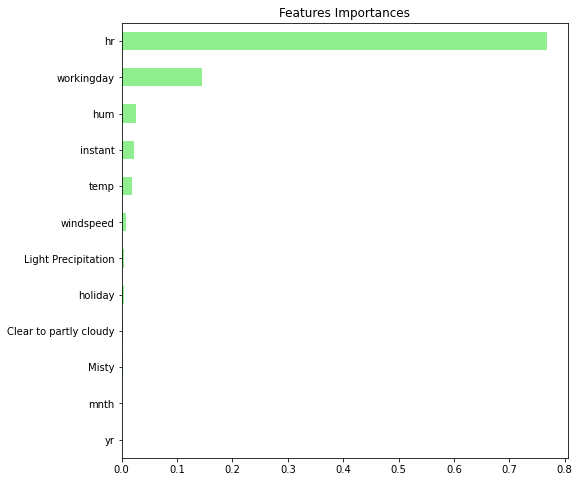

In [40]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index = X.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

**Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!**